## Using Siamese Neural Networks for finding similarity and dissimilarity between Real and Forged signatures.

<div style="text-align: right"> By Smit Doshi </div>

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import random
from itertools import combinations
from PIL import Image ,ImageOps
from math import comb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

### Data Preprocessing 
##### You can find the dataset [here](https://drive.google.com/drive/folders/11vgLS38J0rI4PsGP2x6NRYLiqCxu4YvN?usp=sharing)

#### Total number of Real and Dissimilar pairs

In [2]:
def count_pairs(dataset = "Train_Set"):
    count_list=[]
    for file in range(1,len(os.listdir('Signatures_2/' + dataset))):

        if file < 10:


            F_location = os.listdir('Signatures_2/' + dataset+ '/'+ "00" + str(file) + '/Forged')
            R_location = os.listdir('Signatures_2/' + dataset+ '/'+ "00" + str(file) + '/Real')

            if '.DS_Store' in F_location:
                F_location.remove('.DS_Store')
                F_count = len(F_location)
                if '.DS_Store' in R_location:
                    R_location.remove('.DS_Store')
                    R_count = len(R_location)
                else:    
                    R_count = len(R_location)


            elif '.DS_Store' in R_location:
                R_location.remove('.DS_Store')
                R_count = len(F_location)
                if '.DS_Store' in F_location:
                    F_location.remove('.DS_Store')
                    F_count = len(F_location)
                else:    
                    F_count = len(F_location)


            else:
                F_count = len(F_location)
                R_count = len(R_location)
            #print("Person "+ "00" +str(file),F_count,R_count)

        else:
            F_location = os.listdir('Signatures_2/'+ dataset+ '/'+ "0" + str(file) + '/Forged')
            R_location = os.listdir('Signatures_2/'+ dataset+ '/'+ "0" + str(file) + '/Real')

            if '.DS_Store' in F_location:
                F_location.remove('.DS_Store')
                F_count = len(F_location)
                if '.DS_Store' in R_location:
                    R_location.remove('.DS_Store')
                    R_count = len(R_location)
                else:    
                    R_count = len(R_location)


            elif '.DS_Store' in R_location:
                R_location.remove('.DS_Store')
                R_count = len(F_location)
                if '.DS_Store' in F_location:
                    F_location.remove('.DS_Store')
                    F_count = len(F_location)
                else:    
                    F_count = len(F_location)

            else:
                F_count = len(F_location)
                R_count = len(R_location)
            #print("Person "+ "0" +str(file),F_count,R_count)
        count_list.append({'Person':file,"Real":R_count,"Forged":F_count})


    return pd.DataFrame(count_list)

In [3]:
def transform(df):
    df['Dissimilar_Pairs'] = df['Real'] * df['Forged']
    df["Similar_Pairs"] = ""
    for row in range(0,len(df)):
        number = df['Real'][row]
        df['Similar_Pairs'][row] = comb(number,2)
    df['Total_Pairs'] = df['Dissimilar_Pairs'] + df['Similar_Pairs']
    return df

In [4]:
train_df = count_pairs('Train_Set')
train_df = transform(train_df)
train_df

<ipython-input-3-651e47385362>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Similar_Pairs'][row] = comb(number,2)


,Person,Real,Forged,Dissimilar_Pairs,Similar_Pairs,Total_Pairs
0,1,24,8,192,276,468
1,2,24,12,288,276,564
2,3,24,12,288,276,564
3,4,24,11,264,276,540
4,5,24,12,288,276,564
...,...,...,...,...,...,...
59,60,12,8,96,66,162
60,61,12,16,192,66,258
61,62,12,8,96,66,162
62,63,12,8,96,66,162


##### Total Count of Pairs in train set = 16660 

In [5]:
train_df.sum()['Total_Pairs']

16660

In [6]:
test_df = count_pairs('Test_Set')
test_df = transform(test_df)
test_df

<ipython-input-3-651e47385362>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Similar_Pairs'][row] = comb(number,2)


,Person,Real,Forged,Dissimilar_Pairs,Similar_Pairs,Total_Pairs
0,1,12,12,144,66,210
1,2,12,12,144,66,210
2,3,12,8,96,66,162
3,4,12,16,192,66,258
4,5,12,16,192,66,258
5,6,12,20,240,66,306
6,7,12,12,144,66,210
7,8,12,8,96,66,162
8,9,12,12,144,66,210
9,10,12,16,192,66,258


##### Total Count of Pairs in test set = 4362

In [7]:
test_df.sum()['Total_Pairs']

4362

#### Making Pairs and extracting the Image data after resizing and in form of array with individual values between [0,1]

In [8]:
def real_pairs(LIST,dataset='Train_Set'):
    
    X =[]
    y =[]
    
    for number in LIST:
        #print(number)
        
        location = 'Signatures_2/' + dataset + '/'
        
        if '.DS_Store' in os.listdir(location + number + '/Real/'):
            listR = os.listdir(location + number + '/Real/')
            listR.remove('.DS_Store')
        else:
            listR = os.listdir(location + number + '/Real/')
        
        for pairs in combinations(listR,2):
            
            image1 = np.asarray(Image.open(location + number +'/Real/'+ pairs[0]).convert('RGB').resize((32,32)))
            image2 = np.asarray(Image.open(location + number +'/Real/'+ pairs[1]).convert('RGB').resize((32,32)))
            
            
            X.append([image1,image2])
            y.append(float(1))
            
        
    return np.array(X) / 255 , np.array(y)


def dissimilar_pair(LIST,dataset='Train_Set'):
    
    X =[]
    y =[]
    
    for number in LIST:
        #print(number)
        location = 'Signatures_2/' + dataset + '/'
        R = location + number + '/Real/'
        F = location + number + '/Forged/'
        
        list1=os.listdir(R)
        if '.DS_Store' in list1:
            list1.remove('.DS_Store')
        
        list2=os.listdir(F)
        if '.DS_Store' in list2:
            list2.remove('.DS_Store')
        
        if '.DS_Store' in list2:
            list2 = list2[1:]
            if '.DS_Store' in list1:
                list1.remove('.DS_Store')
        else:
            list1 = list1[1:]
            if '.DS_Store' in list2:
                list2.remove('.DS_Store')
            
        
        output = [[a, b] for a in list1  
          for b in list2 if a != b]
        
        for pairs in output:
            
            image1 = np.asarray(Image.open(location + number +'/Real/'+ pairs[0]).convert('RGB').resize((32,32)))
            image2 = np.asarray(Image.open(location + number +'/Forged/'+ pairs[1]).convert('RGB').resize((32,32)))
            
            
            X.append([image1,image2])
            y.append(float(0))                        
        
    return np.array(X) / 255 , np.array(y)

#### Getting the input list for train set

In [9]:
train_list = os.listdir('Signatures_2/Train_Set/')
train_list.remove('.DS_Store')
train_list.sort()
#train_list

#### Getting the Real Pairs and Labels for train set

In [10]:
RP_train,RP_labels = real_pairs(train_list,dataset='Train_Set')

#### Getting the Dissimilar Pairs and Labels for train set

In [11]:
DP_train , DP_labels = dissimilar_pair(train_list,dataset='Train_Set')

#### Getting the input list for test set

In [12]:
test_list = os.listdir('Signatures_2/Test_Set/')
test_list.remove('.DS_Store')
test_list.sort()

#### Getting the Real Pairs and Labels for test set

In [13]:
RP_test , RP_test_labels = real_pairs(test_list,dataset='Test_Set')

#### Getting the Real Pairs and Labels for test set

In [14]:
DP_test , DP_test_labels = dissimilar_pair(test_list,dataset='Test_Set')

#### Stacking the Real and Dissimilar pairs into single array for train set

In [15]:
train_pairs = np.vstack((RP_train, DP_train))
#train_pairs

#### Shape says that there are total 16143 pairs of 32x32 size having RGB color scheme

In [16]:
train_pairs.shape

(16143, 2, 32, 32, 3)

#### Stacking the Real and Dissimilar labels into single array for train set

In [17]:
train_labels = np.hstack((RP_labels, DP_labels))
train_labels

array([1., 1., 1., ..., 0., 0., 0.])

#### Stacking the Real and Dissimilar pairs into single array for train set

In [18]:
test_pairs = np.vstack((RP_test, DP_test))

#### Shape says that there are total 4114 pairs of 32x32 size having RGB color scheme

In [19]:
test_pairs.shape

(4114, 2, 32, 32, 3)

#### Stacking the Real and Dissimilar pairs into single array for train set

In [20]:
test_labels = np.hstack((RP_test_labels, DP_test_labels))
test_labels

array([1., 1., 1., ..., 0., 0., 0.])

#### Setting the Random State to be same for the pairs and shuffling for better training results

In [21]:
random_state = np.random.get_state()
np.random.shuffle(train_pairs)

In [22]:
np.random.set_state(random_state)
np.random.shuffle(train_labels)

In [23]:
#random_state = np.random.get_state()
np.random.set_state(random_state)
np.random.shuffle(test_pairs)

In [24]:
np.random.set_state(random_state)
np.random.shuffle(test_labels)
test_labels

array([1., 1., 0., ..., 0., 0., 0.])

##### So now , our dataset is ready - we should now head to learning phase.

### Machine Learning Part

#### Importing required libraries

In [25]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense , Flatten , Conv2D , AveragePooling2D , Activation ,merge ,Lambda , Subtract
from keras.models import Model , Sequential
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
from keras.utils import plot_model
from keras.regularizers import l2
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold

#### Defining the input shape of the image

In [26]:
input_shape = (32,32,3)
input_shape

(32, 32, 3)

#### Designing the CNN model

In [27]:
def create_network():
    W_init = keras.initializers.RandomNormal(mean = 0.5, stddev = 1e-2)
    b_init = keras.initializers.RandomNormal(mean = 0.5, stddev = 1e-2)
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape = (32, 32, 3),strides=1,padding='same',kernel_initializer=W_init, bias_initializer=b_init))
    model.add(AveragePooling2D(2,2))
    model.add(Conv2D(64,(3,3),activation='relu',strides=1,padding='same',kernel_initializer=W_init, bias_initializer=b_init))
    model.add(AveragePooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(16,activation='relu'))
    return model

#### Checking out the summary of the network

In [28]:
base_network = create_network()
base_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                65552     
Total params: 84,944
Trainable params: 84,944
Non-trainable params: 0
____________________________________________________

#### Specifying that there will be two inputs 

In [29]:
# Create first half of the siamese system
input_a = tf.keras.layers.Input(shape=(32,32,3))

# Note how we reuse the base_network in both halfs
encoder_a = base_network(input_a)

# Create the second half of the siamese system
input_b = tf.keras.layers.Input(shape=(32,32,3))
encoder_b = base_network(input_b)

#### Calulating the distance betweeen two input layers

In [30]:
l1_dist = tf.keras.layers.Lambda(
    lambda embeddings: tf.keras.backend.abs(embeddings[0] - embeddings[1])) \
    ([encoder_a, encoder_b])

#### Flattening the weight using a Dense Sigmoid Layer

In [31]:
flattened_weighted_distance = tf.keras.layers.Dense(1, activation='sigmoid') \
    (l1_dist)

#### Builing the actual model

In [32]:
# Build the model
model = tf.keras.models.Model([input_a, input_b], flattened_weighted_distance)

#### Compiling the model

In [33]:
# Train
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

#### Fitting the model along with 5 Fold validation on the just the training set.

In [34]:
kf5 = KFold(n_splits=5)

In [35]:
metrics = []
for train_index,test_index in kf5.split(train_pairs,train_labels):
    
    X_train = train_pairs[train_index]
    X_test = train_pairs[test_index]
    y_train = train_labels[train_index]
    y_test = train_labels[test_index]
    
    history = model.fit([X_train[:, 0], X_train[:, 1]], y_train,
                        batch_size=30,
                        epochs=20,
                        use_multiprocessing=True,
                        workers=4,
                        validation_data=([X_test[:, 0], X_test[:, 1]], y_test)
          )
    print('-------------------------------------------------------------------------------------------------------------------------------')
    metrics.append({'acc':history.history['accuracy'],'val_acc':history.history['val_accuracy'],'loss':history.history['loss'],'val_loss':history.history['val_loss']})

Epoch 1/20
431/431 [==============================] - 12s 28ms/step - loss: 11.5413 - accuracy: 0.6051 - val_loss: 3.4486 - val_accuracy: 0.6194
Epoch 2/20
431/431 [==============================] - 12s 28ms/step - loss: 1.4941 - accuracy: 0.6544 - val_loss: 0.6695 - val_accuracy: 0.6658
Epoch 3/20
431/431 [==============================] - 13s 30ms/step - loss: 0.5553 - accuracy: 0.7147 - val_loss: 0.5433 - val_accuracy: 0.7114
Epoch 4/20
431/431 [==============================] - 13s 30ms/step - loss: 0.5252 - accuracy: 0.7387 - val_loss: 0.5302 - val_accuracy: 0.7352
Epoch 5/20
431/431 [==============================] - 15s 35ms/step - loss: 0.5117 - accuracy: 0.7533 - val_loss: 0.5323 - val_accuracy: 0.7417
Epoch 6/20
431/431 [==============================] - 19s 45ms/step - loss: 0.5007 - accuracy: 0.7656 - val_loss: 0.4998 - val_accuracy: 0.7649
Epoch 7/20
431/431 [==============================] - 14s 32ms/step - loss: 0.4820 - accuracy: 0.7790 - val_loss: 0.4791 - val_accuracy

#### Visualizing the results

In [ ]:
fold_n =[]
mean = []
median =[]
std = []
for fold in [0,1,2,3,4]:
    fold_n.append(fold + 1)
    mean.append(np.mean(metrics[fold]['val_acc'])*100)
    median.append(np.median(metrics[fold]['val_acc'])*100)
    std.append(np.std(metrics[fold]['val_acc'])*100)

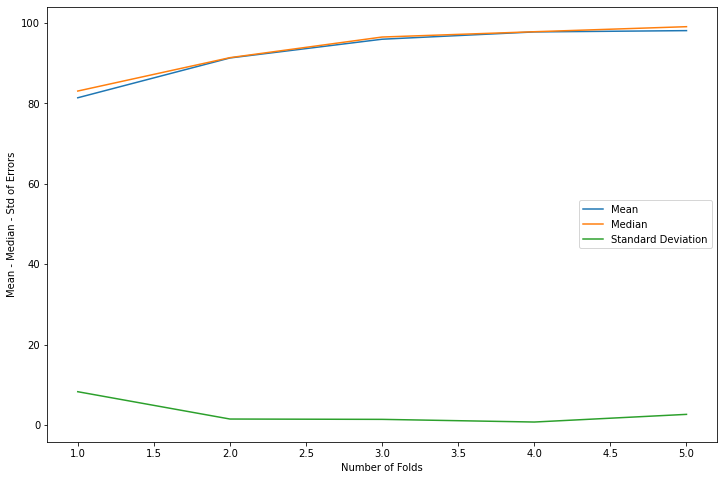

In [77]:
plt.plot(fold_n,mean)
plt.plot(fold_n,median)
plt.plot(fold_n,std)
plt.xlabel('Number of Folds')
plt.ylabel('Mean - Median - Std of Errors')
plt.legend(["Mean", "Median","Standard Deviation"], loc ="center right") 

In [132]:
accuracy = metrics[0]['acc'] + metrics[1]['acc'] + metrics[2]['acc'] + metrics[3]['acc'] + metrics[4]['acc']
loss = metrics[0]['loss'] + metrics[1]['loss'] + metrics[2]['loss'] + metrics[3]['loss'] + metrics[4]['loss']

In [133]:
accuracy = [element * 100 for element in accuracy]
loss= [element * 100 for element in loss]

In [135]:
len(loss)

100

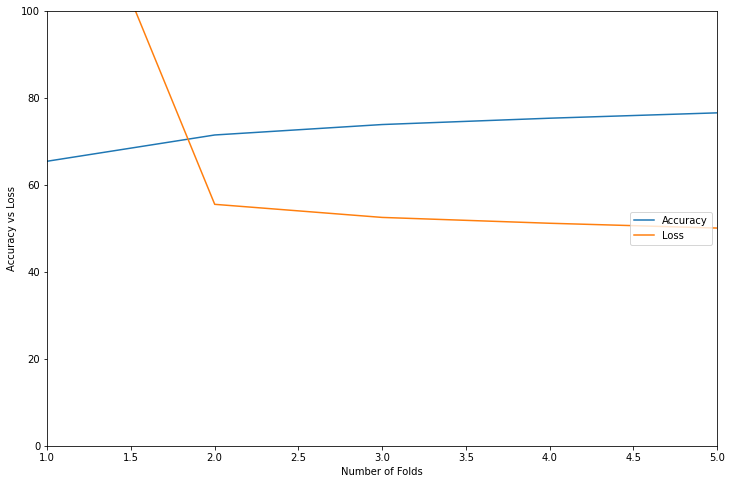

In [136]:
plt.xlim(1, 5)
plt.ylim(0, 100)

plt.plot(accuracy)
plt.plot(loss)
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy vs Loss')
plt.legend(["Accuracy", "Loss"], loc ="center right")

#### Fitting the model to the training set as required to do.

In [36]:
model.fit([train_pairs[:, 0], train_pairs[:, 1]], train_labels,
          batch_size=30,
          epochs=20,
          use_multiprocessing=True,
          workers=8
          )

Epoch 1/20
539/539 [==============================] - 14s 26ms/step - loss: 0.0310 - accuracy: 0.9918
Epoch 2/20
539/539 [==============================] - 14s 27ms/step - loss: 0.0219 - accuracy: 0.9954
Epoch 3/20
539/539 [==============================] - 15s 27ms/step - loss: 0.0154 - accuracy: 0.9985
Epoch 4/20
539/539 [==============================] - 14s 26ms/step - loss: 0.0170 - accuracy: 0.9975
Epoch 5/20
539/539 [==============================] - 14s 26ms/step - loss: 0.0144 - accuracy: 0.9985
Epoch 6/20
539/539 [==============================] - 14s 25ms/step - loss: 0.0383 - accuracy: 0.9893
Epoch 7/20
539/539 [==============================] - 14s 26ms/step - loss: 0.0140 - accuracy: 0.9988
Epoch 8/20
539/539 [==============================] - 15s 29ms/step - loss: 0.0170 - accuracy: 0.9972
Epoch 9/20
539/539 [==============================] - 14s 26ms/step - loss: 0.0204 - accuracy: 0.9965
Epoch 10/20
539/539 [==============================] - 14s 26ms/step - loss: 0.035

#### Predicting on the test set.

In [37]:
pred = model.predict([test_pairs[:, 0], test_pairs[:, 1]])
pred

array([[9.9995279e-01],
       [9.9816054e-01],
       [1.7902932e-01],
       ...,
       [2.7767110e-01],
       [4.7187797e-05],
       [5.2521817e-19]], dtype=float32)

#### Plotting the histogra to see the ditribution of the predicted values

Text(0.5, 0, 'Labels')

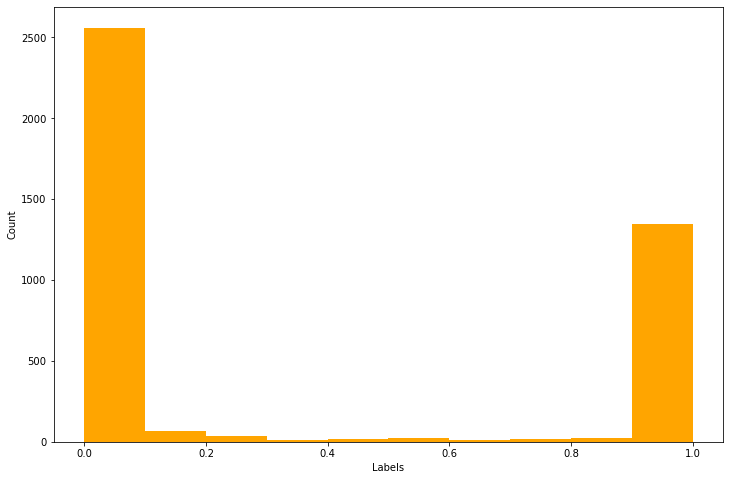

In [78]:
plt.hist(pred,color='orange')
plt.ylabel('Count')
plt.xlabel('Labels')

#### As we can see here , most of the values are either near to 0 or 1 - which means our model is really good at predicting similar and dissimilar pairs

In [39]:
print(confusion_matrix(test_labels,pred.round()))
print(classification_report(test_labels,pred.round()))

[[2693   35]
 [   4 1382]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2728
         1.0       0.98      1.00      0.99      1386

    accuracy                           0.99      4114
   macro avg       0.99      0.99      0.99      4114
weighted avg       0.99      0.99      0.99      4114



#### As we can see here , the model is predicting with 99 % accurancy with recall and precision near to one.

##### Probably, our model is overfitted.